<a href="https://colab.research.google.com/github/manvithreddy250/simple-Sentiment-Analysis-using-google-collab/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model Accuracy: 87.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



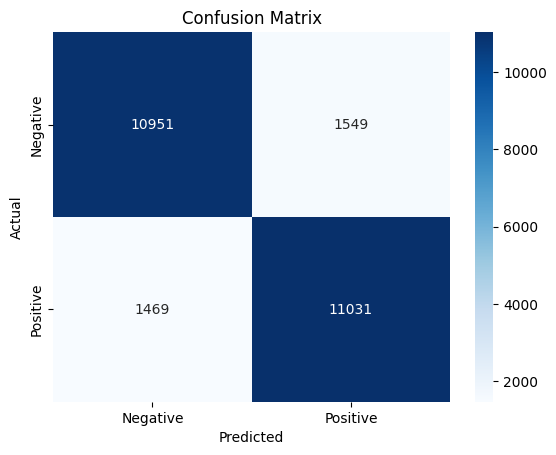

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Load IMDb Dataset from Keras
from tensorflow.keras.datasets import imdb

# Load dataset with only top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Convert the indices back to words for easier readability
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Decode reviews for both train and test sets
X_train = [decode_review(x) for x in X_train]
X_test = [decode_review(x) for x in X_test]

# Step 3: Preprocess the data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the reviews
X_train_cleaned = [preprocess_text(text) for text in X_train]
X_test_cleaned = [preprocess_text(text) for text in X_test]

# Step 4: Tokenization and Vectorization (TF-IDF)
# Convert text into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)
X_test_tfidf = vectorizer.transform(X_test_cleaned)

# Step 5: Build and Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 6: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Test the Model with Custom Input
def predict_sentiment(text):
    processed_text = preprocess_text(text)
    text_tfidf = vectorizer.transform([processed_text])
    prediction = model.predict(text_tfidf)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test the model with a custom input
custom_review = input("Enter a movie review: ")
print(f"Sentiment: {predict_sentiment(custom_review)}")
